<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Цель работы состояла в создании модели, которая смогла бы предсказать коэффициент восстановления золота из руды, знание о котором использовалось для принятия решения об оптимизации производства.

План работы:  
1. ознакомится с технологическим циклом по восстановлению золота.
2. из представленных данных сфоромировать показатели, кторые напрямую влияют на результат процесса флотации и на результат двойной очистки для получения концентрата золота с высокой долей металла в финанльном концентрате.
3. сравнить разные модели машинного обучения с использованием заданной метрики качества.
4. работу лучшей модели проверить на тестовой выборке.
5. проверить адекватность модели.

## Подготовка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [ ]:
gold_industry_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [ ]:
gold_industry_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [ ]:
gold_industry_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [ ]:
gold_industry_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [ ]:
gold_industry_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [ ]:
gold_industry_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [ ]:
gold_industry_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [ ]:
#Создадим выборку gold_industry_exam из обучающей с исключением пустых записей для расчета эффективности обогащения
gold_industry_train = gold_industry_train.replace(float("-inf"),np.nan)
gold_industry_exam = gold_industry_train.dropna(subset = ["rougher.input.feed_au",
                                    "rougher.output.concentrate_au",
                                    "rougher.output.tail_au",
                                    "rougher.output.recovery"],axis = 0)

In [ ]:
#Вычисляем эффективность обогащения на обучающей выборке для признака rougher.output.recovery
exam=[]
for i in range(len(gold_industry_exam)):
    input_au = gold_industry_exam.loc[i,'rougher.input.feed_au']
    output_au = gold_industry_exam.loc[i,'rougher.output.concentrate_au']
    output_tail = gold_industry_exam.loc[i,'rougher.output.tail_au']
    exam.append(((output_au) * ((input_au) - (output_tail)))/((input_au) * ((output_au) - (output_tail))) * 100)
exam[0:5]

[87.10776292825425,
 86.84326050586625,
 86.84230825746626,
 87.22642953304764,
 86.68879413602453]

In [ ]:
#Проверяем, что данные эффективности обогащения представлены в сопоставимых единицах с расчетными
gold_industry_train['rougher.output.recovery'].describe()

count    14579.000000
mean        82.521200
std         15.797521
min          0.000000
25%         80.558542
50%         85.946497
75%         89.960375
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [ ]:
#Рассчитаем MAE между своим расчётом и значением признака
mean_absolute_error(gold_industry_exam.loc[:,'rougher.output.recovery'], exam)

9.83758577644259e-15

**Вывод:**
Средняя абсолютная ошибка мала, поэтому можно считать что расчетная величина эффективности равна величине эффективности, представленной в датасете.

In [ ]:
#Найдем столбцы, которые отсутствуют в тестовой выборке
train_col = set(gold_industry_train)
test_col = set(gold_industry_test)
columns_nan=train_col-test_col
print(len(columns_nan))
list(columns_nan)

34


['rougher.output.tail_au',
 'rougher.output.recovery',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_ag',
 'final.output.tail_pb',
 'primary_cleaner.output.concentrate_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_pb',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.recovery',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_sol',
 'rougher.output.concentrate_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.output.concentrate_sol',
 'rougher.output.tail_pb',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.concentrate_sol',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'rougher.calculati

В тестовой выборке отсутствуют 34 столбца. В столбцах находится постинформация, которая относится  либо к расчетной: "calculation", либо это параметры продукта по окончании процессов "output", а также таргетные переменные. В связи с тем, что эти данные не известны в начале технологического процесса, поэтому они отсутствуют в тестовой выборке.

Проверим наличие пропусков данных в обучающей и тестовой выборках.

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
#Посчитаем долю пропусков обучающей выборке по всех столбцах
mask = gold_industry_train.isna().sum()>0
index_train = gold_industry_train.columns[mask]
for col in index_train:
     print('В столбце {} нулевых значений {:.1%}'. format(col, gold_industry_train[col].isna().value_counts()[1] / len(gold_industry_train)))

В столбце rougher.input.feed_pb нулевых значений 0.5%
В столбце rougher.input.feed_sol нулевых значений 0.5%
В столбце rougher.input.feed_rate нулевых значений 0.0%
В столбце rougher.input.feed_size нулевых значений 0.7%
В столбце rougher.input.floatbank10_sulfate нулевых значений 0.2%
В столбце rougher.input.floatbank10_xanthate нулевых значений 0.0%
В столбце rougher.state.floatbank10_e_air нулевых значений 2.9%
В столбце rougher.input.floatbank11_sulfate нулевых значений 0.2%
В столбце rougher.input.floatbank11_xanthate нулевых значений 2.8%
В столбце rougher.calculation.sulfate_to_au_concentrate нулевых значений 0.0%
В столбце rougher.calculation.floatbank10_sulfate_to_au_feed нулевых значений 0.0%
В столбце rougher.calculation.floatbank11_sulfate_to_au_feed нулевых значений 0.0%
В столбце rougher.output.concentrate_sol нулевых значений 0.1%
В столбце rougher.output.tail_ag нулевых значений 0.0%
В столбце primary_cleaner.input.sulfate нулевых значений 0.2%
В столбце primary_cleaner

In [ ]:
#Посчитаем долю пропусков тестовой выборке по всех столбцах
mask = gold_industry_test.isna().sum()>0
index_test = gold_industry_test.columns[mask]
for col in index_test:
     print('В столбце {} нулевых значений {:.1%}'. format(col, gold_industry_test[col].isna().value_counts()[1] / len(gold_industry_test)))

В столбце rougher.input.feed_pb нулевых значений 0.6%
В столбце rougher.input.feed_sol нулевых значений 0.5%
В столбце rougher.input.feed_rate нулевых значений 0.1%
В столбце rougher.input.feed_size нулевых значений 0.9%
В столбце rougher.input.floatbank10_sulfate нулевых значений 0.1%
В столбце rougher.input.floatbank10_xanthate нулевых значений 0.0%
В столбце rougher.state.floatbank10_a_air нулевых значений 0.0%
В столбце rougher.state.floatbank10_a_level нулевых значений 0.0%
В столбце rougher.state.floatbank10_b_air нулевых значений 0.0%
В столбце rougher.state.floatbank10_b_level нулевых значений 0.0%
В столбце rougher.state.floatbank10_c_air нулевых значений 0.0%
В столбце rougher.state.floatbank10_c_level нулевых значений 0.0%
В столбце rougher.state.floatbank10_e_air нулевых значений 0.1%
В столбце rougher.input.floatbank11_sulfate нулевых значений 0.2%
В столбце rougher.input.floatbank11_xanthate нулевых значений 0.9%
В столбце primary_cleaner.input.sulfate нулевых значений 0.

In [ ]:
#Посчитаем долю пропусков полном датасете по всех столбцах
mask = gold_industry_full.isna().sum()>0
index_full = gold_industry_full.columns[mask]
for col in index_test:
     print('В столбце {} нулевых значений {:.1%}'. format(col, gold_industry_full[col].isna().value_counts()[1] /
                                                          len(gold_industry_full)))

В столбце rougher.input.feed_pb нулевых значений 0.5%
В столбце rougher.input.feed_sol нулевых значений 0.5%
В столбце rougher.input.feed_rate нулевых значений 0.1%
В столбце rougher.input.feed_size нулевых значений 0.7%
В столбце rougher.input.floatbank10_sulfate нулевых значений 0.2%
В столбце rougher.input.floatbank10_xanthate нулевых значений 0.0%
В столбце rougher.state.floatbank10_a_air нулевых значений 0.0%
В столбце rougher.state.floatbank10_a_level нулевых значений 0.0%
В столбце rougher.state.floatbank10_b_air нулевых значений 0.0%
В столбце rougher.state.floatbank10_b_level нулевых значений 0.0%
В столбце rougher.state.floatbank10_c_air нулевых значений 0.0%
В столбце rougher.state.floatbank10_c_level нулевых значений 0.0%
В столбце rougher.state.floatbank10_e_air нулевых значений 2.2%
В столбце rougher.input.floatbank11_sulfate нулевых значений 0.2%
В столбце rougher.input.floatbank11_xanthate нулевых значений 2.3%
В столбце primary_cleaner.input.sulfate нулевых значений 0.

Наблюдаем, что пустых значений очень мало, поэтому их можно просто удалить. Хотя в условии задачи сказано, что соседние по времени параметры часто похожи, поэтому можно после анализа данных заполнить пропуски методом ffill, то есть предыдущими данными.

Проверим наличие дубликатов

In [ ]:
gold_industry_train.duplicated().sum()

0

In [ ]:
gold_industry_test.duplicated().sum()

0

In [ ]:
gold_industry_full.duplicated().sum()

0

Дополним тестовую выборку таргетными значениями из полного датафрейма.

In [ ]:
#Запишем названия таргеных столбцов в список
y_rougher = 'rougher.output.recovery'
y_final = 'final.output.recovery'
targets = [y_rougher,y_final]
# gold_industry_test[targets]=gold_industry_full.loc[gold_industry_test.index,targets]

In [ ]:
gold_industry_test = gold_industry_test.merge(gold_industry_full[['rougher.output.recovery', 'final.output.recovery', 'date']],
                                               how = 'inner', on= 'date')

In [ ]:
gold_industry_train.ffill(axis=0, inplace=True)

In [ ]:
gold_industry_test.ffill(axis=0, inplace=True)

In [ ]:
gold_industry_full.ffill(axis=0, inplace=True)

Данные готовы к анализу.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Построим распределения.

In [ ]:
#функция для построения графиков концентрации металлов на разных стадиях обогащения
def hist_metal(metal, metal_name,stage):
    gold_industry_full[metal].hist(bins=50, grid = True)
    plt.title(f'Контрация {metal_name} на стадии {stage}')
    plt.xlabel('Концентрация металла', fontsize=10)
    plt.show()

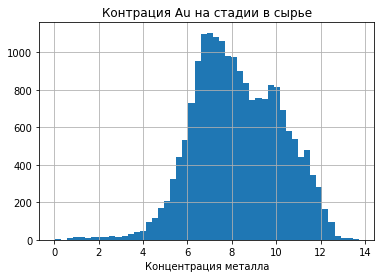

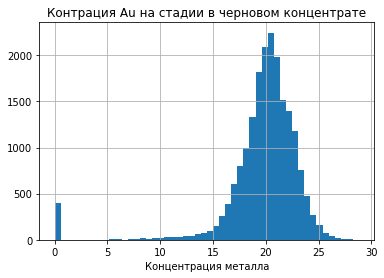

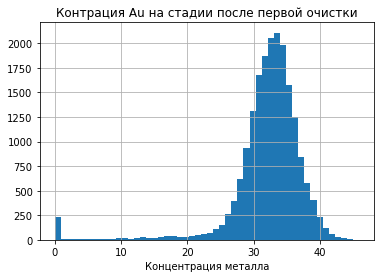

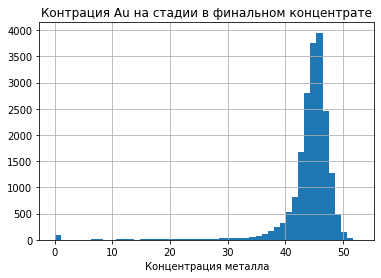

In [ ]:
hist_metal('rougher.input.feed_au', 'Au','в сырье')
hist_metal('rougher.output.concentrate_au', 'Au','в черновом концентрате')
hist_metal('primary_cleaner.output.concentrate_au', 'Au','после первой очистки')
hist_metal('final.output.concentrate_au', 'Au','в финальном концентрате')

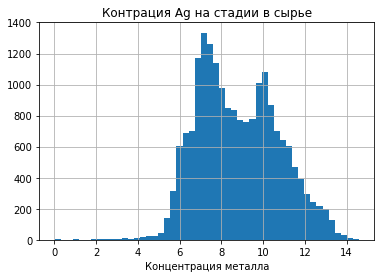

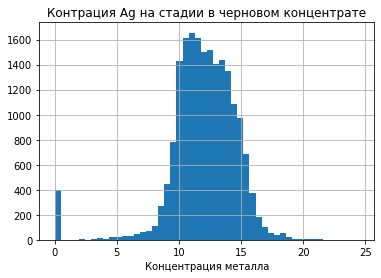

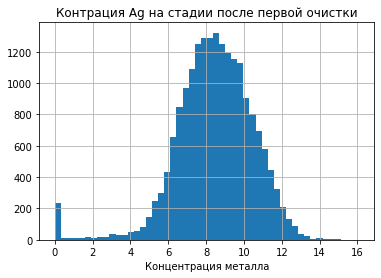

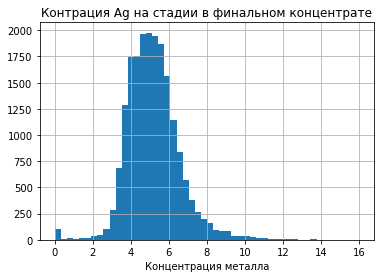

In [ ]:
hist_metal('rougher.input.feed_ag', 'Ag','в сырье')
hist_metal('rougher.output.concentrate_ag', 'Ag','в черновом концентрате')
hist_metal('primary_cleaner.output.concentrate_ag', 'Ag','после первой очистки')
hist_metal('final.output.concentrate_ag', 'Ag','в финальном концентрате')

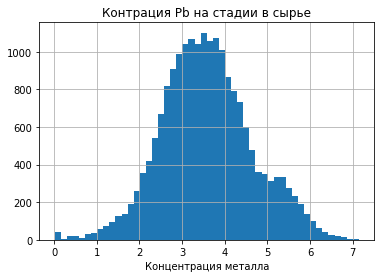

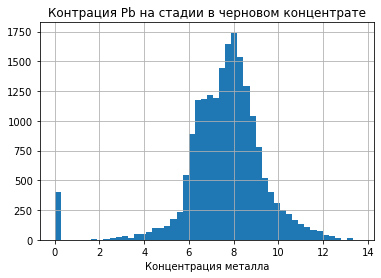

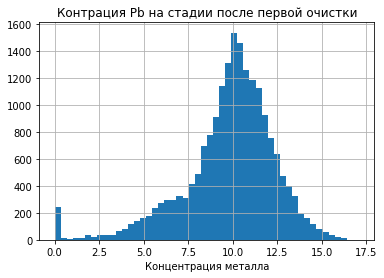

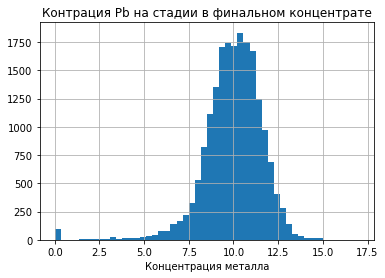

In [ ]:
hist_metal('rougher.input.feed_pb', 'Pb','в сырье')
hist_metal('rougher.output.concentrate_pb', 'Pb','в черновом концентрате')
hist_metal('primary_cleaner.output.concentrate_pb', 'Pb','после первой очистки')
hist_metal('final.output.concentrate_pb', 'Pb','в финальном концентрате')

**Вывод:**
Наблюдается рост концентрации au на каждой стадии обогащения от 7% в сырье до 45 процентов в финальном концентрате. Ag, Pb являсь вспомогательными продуктами обогащения в среднем их концентрации остаются примерно на одинаковом уровне с небольшим уменьшением на финальной стадии по Ag.

Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

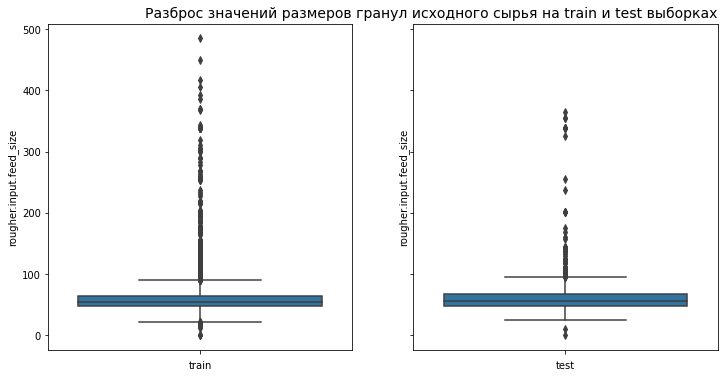

In [ ]:
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
sns.boxplot(y="rougher.input.feed_size", data=gold_industry_train, orient='v', ax=ax1)
sns.boxplot(y="rougher.input.feed_size", data=gold_industry_test, orient='v', ax=ax2)
ax1.set_xlabel('train')
ax2.set_xlabel('test')
plt.title('Разброс значений размеров гранул исходного сырья на train и test выборках',fontsize=14, loc= 'right')

plt.show()

Средние выборок находятся примерно на одном уровне, выбросы шире в обучайщей выборке. Визулизируем распределение.Учитывая, что тестовая выборка меньше обучающей сравнивать будем выорочные плотности вероятностей.  

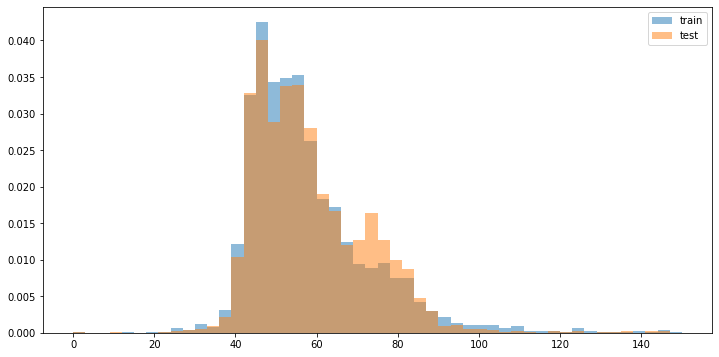

In [ ]:
f, (axes) = plt.subplots(1, 1, sharey=True, figsize=(12, 6))
plt.hist(gold_industry_train['rougher.input.feed_size'], bins=50,alpha=0.5, label='train', density=True, range=(0,150))
plt.hist(gold_industry_test['rougher.input.feed_size'], bins=50, alpha=0.5, label='test', density=True, range=(0,150))
plt.legend(loc='upper right')
plt.show()

Распределение на картинке как будто похожи, однако более крупные фракции встречаются в тестовой выборке чаще.
Проверим гипотезу о схожести распределений размеров гранул на обучающей и тестовой выборках статистическими методами.


Исследуем методом Т-тестом. Это проверка нулевой гипотезы о том, что две независимые выборки имеют одинаковые средние (ожидаемые) значения.

In [ ]:
from scipy import stats as st
results = st.ttest_ind(gold_industry_train['rougher.input.feed_size'], gold_industry_test['rougher.input.feed_size'],equal_var=False)
# results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = задайте значение уровня значимости

p_value = results.pvalue # вывод значения p-value на экран
if  p_value < alpha:
    print(p_value)
    print ('Отвергаем нулевую гипотезу')
else:
    print(p_value)
    print('Не получилось отвергнуть нулевую гипотезу')# условный оператор с выводом строки с ответом


0.8468970428326675
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  
Выборки однородны. При этом использование других тестов говорит о противоположном. Видимо есть ньюнсы в применении методов статистичекого анализа о которых я еще не знаю.

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [ ]:
#функция для построения гистограммы для суммарной концентрации металлов на разных стадиях
def plt_metal (metal_sum,stage):
    plt.subplots(figsize = (10,5))
    sns.histplot(metal_sum, fill=True, bins=300)
    plt.title(f'Суммарная концентрация металлов {stage}')

In [ ]:
metal_sum_input = gold_industry_full[['rougher.input.feed_au',
                                      'rougher.input.feed_ag',
                                      'rougher.input.feed_pb']].sum(axis=1)

In [ ]:
metal_sum_output = gold_industry_full[['rougher.output.concentrate_au',
                                        'rougher.output.concentrate_ag',
                                        'rougher.output.concentrate_pb']].sum(axis=1)

In [ ]:
metal_sum_primary_cleaner = gold_industry_full[['primary_cleaner.output.concentrate_ag',
                                                'primary_cleaner.output.concentrate_au',
                                                'primary_cleaner.output.concentrate_pb']].sum(axis=1)

In [ ]:
metal_sum_final = gold_industry_full[['final.output.concentrate_ag',
                                      'final.output.concentrate_au',
                                      'final.output.concentrate_pb']].sum(axis=1)

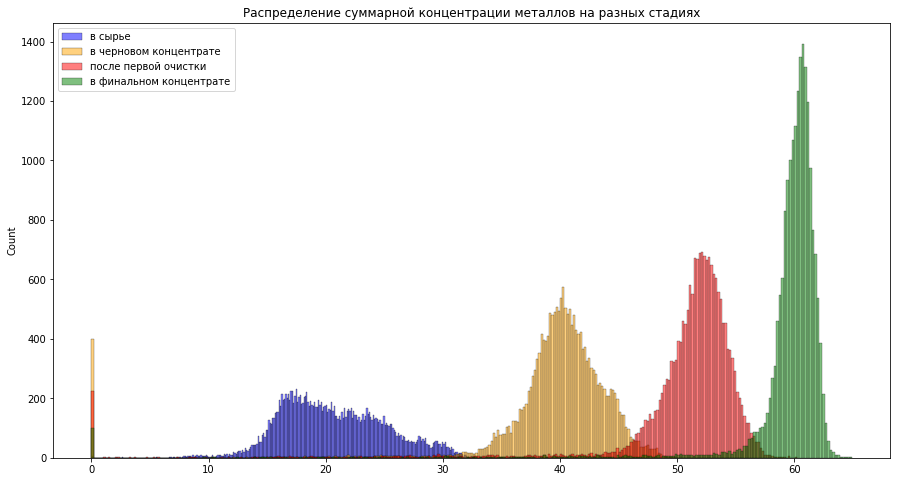

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(metal_sum_input, fill=True, bins=300, alpha=0.5, label='в сырье', color='blue')
sns.histplot(metal_sum_output, fill=True, bins=300, alpha=0.5, label='в черновом концентрате', color='orange')
sns.histplot(metal_sum_primary_cleaner, fill=True, bins=300, alpha=0.5, label='после первой очистки', color='red')
sns.histplot(metal_sum_final, fill=True, bins=300, alpha=0.5, label='в финальном концентрате', color='green')
plt.title('Распределение суммарной концентрации металлов на разных стадиях')
plt.legend()
plt.show()

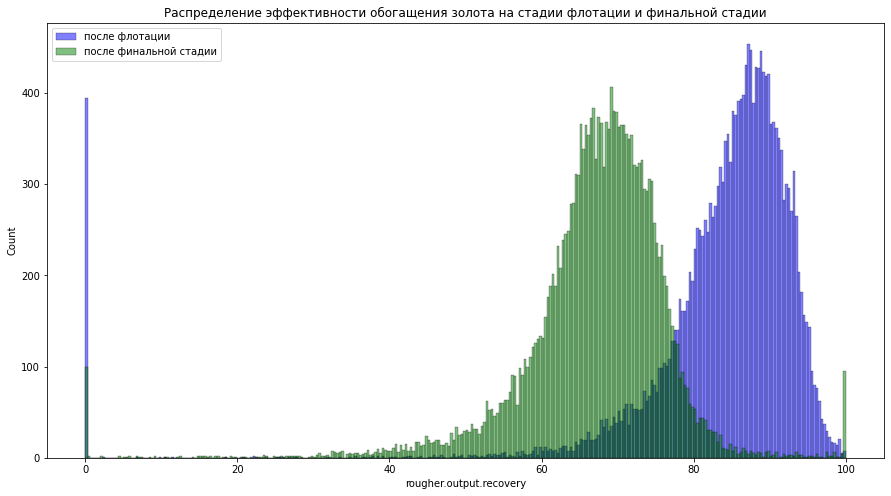

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(gold_industry_full[y_rougher], fill=True, bins=300, alpha=0.5, color='blue',label='после флотации')
sns.histplot(gold_industry_full[y_final], fill=True, bins=300, alpha=0.5, color='green',label='после финальной стадии')
plt.title('Распределение эффективности обогащения золота на стадии флотации и финальной стадии')
plt.legend()
plt.show()

 **Вывод:**  
На графиках хорошо видно как увеличивается концентрация металлов к финальной стадии. Однако также явно видны выбросы как на графиках признаков так и графиках эффективности обогащения в районе нуля. Считаю целесообразно их удалить анамолии. Концентрация около нуля может быть вызвана сбоями оборудования.

Исключим выбросы из выборок.

In [ ]:
#удаляем из всех выборок выбросы у нуля
col1=['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']
gold_industry_train['sum_metall1']=gold_industry_train[col1].sum(axis= 1)
gold_industry_test['sum_metall1']=gold_industry_test[col1].sum(axis= 1)
col2=['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb']
gold_industry_train['sum_metall2']=gold_industry_train[col2].sum(axis= 1)
col3=['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_pb']
gold_industry_train['sum_metall3']=gold_industry_train[col3].sum(axis= 1)
col4 = ['final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb']
gold_industry_train['sum_metall4']=gold_industry_train[col4].sum(axis= 1)

In [ ]:
q1 = gold_industry_train["sum_metall1"].quantile(0.25)
q3 = gold_industry_train["sum_metall1"].quantile(0.75)
gold_industry_train["sum_metall1"] = gold_industry_train["sum_metall1"].clip(lower = q1 - 1.5*(q3-q1))

In [ ]:
q1 = gold_industry_train["sum_metall2"].quantile(0.25)
q3 = gold_industry_train["sum_metall2"].quantile(0.75)
gold_industry_train["sum_metall2"] = gold_industry_train["sum_metall2"].clip(lower = q1 - 1.5*(q3-q1))

In [ ]:
q1 = gold_industry_train["sum_metall3"].quantile(0.25)
q3 = gold_industry_train["sum_metall3"].quantile(0.75)
gold_industry_train["sum_metall3"] = gold_industry_train["sum_metall3"].clip(lower = q1 - 1.5*(q3-q1))

In [ ]:
q1 = gold_industry_train["sum_metall4"].quantile(0.25)
q3 = gold_industry_train["sum_metall4"].quantile(0.75)
gold_industry_train["sum_metall4"] = gold_industry_train["sum_metall4"].clip(lower = q1 - 1.5*(q3-q1))

In [ ]:
q1 = gold_industry_test["sum_metall1"].quantile(0.25)
q3 = gold_industry_test["sum_metall1"].quantile(0.75)
gold_industry_test["sum_metall1"] = gold_industry_test["sum_metall1"].clip(lower = q1 - 1.5*(q3-q1))

Наличие выбросов не всегда говорит о том, что их обязательно нужно обрабатывать (необходимо исходить из контекста ситуации, понимать, перед нами ошибка, или вполне реальное, но экстремальное значение). В нашем случае подозрения вызывают именно нулевые значения, которые слишком выбиваются из общего распределения и как раз очень похожи либо на ошибку измерений, либо на случайно попавшиеся кусочки руды, которую нельзя считать золотосодержащей. Оставляя такие нулевые наблюдения в выборке, мы будем немного сбивать модель с толку, пытаясь научить ее распознавать золото там, где его как будто бы и нет. Удалять из выборки ненулевые, но достаточно редкие наблюдения, возможно, уже и не надо. Зависит от того, хотим ли мы пытаться научить модель распознавать эту редкую группу наблюдений и делать для них более точные предсказания (суммарное расчетное качество модели от этого может пострадать, зависит от того, какую метрику мы используем), или же не хотим.

## Модель

In [ ]:
#функция для вычисления итоговой sMAPE
def sMAPE_total (rougher,final):
    return (0.25*rougher)+(0.75*final)

In [ ]:
def sMAPE(target,predict):
        return 1/len(target) * np.sum(2 * np.abs(target - predict) / (np.abs(target) + np.abs(predict))*100)

Формируем выборки для обучения.

In [ ]:
#Убираем из обучающей выборки столбцы, которых нет в тестовой выборке и которые добавляли для анализа данных
gold_industry_train = gold_industry_train.drop(set(gold_industry_train.columns)-set(gold_industry_test.columns), axis=1)
gold_industry_train = gold_industry_train.drop(['date','sum_metall1'],axis=1)
gold_industry_test = gold_industry_test.drop(['date','sum_metall1'],axis=1)

In [ ]:
X_train = gold_industry_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
X_train_rougher = X_train.filter(regex ='^rougher',axis=1)
y_train_rougher = gold_industry_train['rougher.output.recovery']
print(X_train_rougher.shape)
print(y_train_rougher.shape)

X_train_output = gold_industry_train.drop(['final.output.recovery','rougher.output.recovery'],axis=1)
y_train_output = gold_industry_train['final.output.recovery']
print(X_train_output.shape)
print(y_train_output.shape)

(14579, 22)
(14579,)
(14579, 52)
(14579,)


In [ ]:
X_test = gold_industry_test.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
X_test_rougher = X_test.filter(regex ='^rougher',axis=1)
y_test_rougher = gold_industry_test['rougher.output.recovery']
print(X_test_rougher.shape)
print(y_test_rougher.shape)

X_test_output = gold_industry_test.drop(['final.output.recovery','rougher.output.recovery'],axis=1)
y_test_output = gold_industry_test['final.output.recovery']
print(X_test_output.shape)
print(y_test_output.shape)

(4860, 22)
(4860,)
(4860, 52)
(4860,)


Обучаем модели.

In [ ]:
model = LinearRegression()
sMAPE_scor = make_scorer(sMAPE, greater_is_better=False)
rougher_linea = cross_val_score(model, X_train_rougher , y_train_rougher, scoring=sMAPE_scor,cv=5)
final_linea =  cross_val_score(model, X_train_output, y_train_output, scoring=sMAPE_scor, cv=5)
print('Итоговое sMape для линейной регрессии:', np.abs(sMAPE_total(rougher_linea,final_linea).mean()))

Итоговое sMape для линейной регрессии: 11.575661607489604


In [ ]:
param1 = {
    'max_depth':[1,2,3,4,5,6,7,8],
    'max_leaf_nodes':[2,3,4,5,6,7,8,9,10]
}

seach = RandomizedSearchCV(DecisionTreeRegressor(), param1, n_iter = 10, cv=5, random_state=12345).\
                           fit(X_train_rougher, y_train_rougher)
print('Лучшие параметры модели для rougher ', seach.best_params_)
rougher_tree = cross_val_score(DecisionTreeRegressor(max_depth=seach.best_params_['max_depth'],\
                                                     max_leaf_nodes=seach.best_params_['max_leaf_nodes'] ),\
                                                     X_train_rougher , y_train_rougher, scoring=sMAPE_scor, cv=5)
seach = RandomizedSearchCV(DecisionTreeRegressor(), param1, n_iter = 10, cv=5, random_state=12345).\
                           fit(X_train_output, y_train_output)
print('Лучшие параметры модели для output ', seach.best_params_)
final_tree = cross_val_score(DecisionTreeRegressor(max_depth=seach.best_params_['max_depth'],\
                                                   max_leaf_nodes=seach.best_params_['max_leaf_nodes'] ),\
                                                   X_train_output, y_train_output, scoring=sMAPE_scor, cv=5)
print('Итоговое sMAPE для решающего дерева:', np.abs(sMAPE_total(rougher_tree, final_tree).mean()))

Лучшие параметры модели для rougher  {'max_leaf_nodes': 10, 'max_depth': 3}
Лучшие параметры модели для output  {'max_leaf_nodes': 4, 'max_depth': 3}
Итоговое sMAPE для решающего дерева: 11.120819225749846


In [ ]:
param2 = {
    'n_estimators' : [10,20,30,40,50,60],
    'max_depth' : [1,2,3,4,5,6,7,8]
}

seach = RandomizedSearchCV(RandomForestRegressor(), param2, n_iter = 10, cv=5, random_state=12345).\
                           fit(X_train_rougher, y_train_rougher)
print('Лучшие параметры модели для rougher ', seach.best_params_)

rougher_forest = cross_val_score(RandomForestRegressor(n_estimators=seach.best_params_['n_estimators'],\
                                 max_depth=seach.best_params_['max_depth']),X_train_rougher, y_train_rougher, scoring=sMAPE_scor, cv=5)
seach = RandomizedSearchCV(RandomForestRegressor(), param2, n_iter = 10, cv=5, random_state=12345).\
                           fit(X_train_output, y_train_output)
print('Лучшие параметры модели для output ', seach.best_params_)
final_forest = cross_val_score(RandomForestRegressor(n_estimators=seach.best_params_['n_estimators'],\
                                                     max_depth=seach.best_params_['max_depth']),\
                                                     X_train_output, y_train_output, scoring=sMAPE_scor, cv=5)
print('Итоговое sMAPE для случайного леса:', np.abs(sMAPE_total(rougher_forest, final_forest).mean()))

Лучшие параметры модели для rougher  {'n_estimators': 50, 'max_depth': 7}
Лучшие параметры модели для output  {'n_estimators': 30, 'max_depth': 4}
Итоговое sMAPE для случайного леса: 11.303057364082257


Для решения задачи с целью проверки качества моделей использовали метрику SMAPE - симметричное среднее абсолютное процентное отклонение. Лучшее значение  метрики получилось на DecisionTreeRegressor(). Задача стояла минимизировать отклонения.

Проверим лучшую модель на тестовой выборке.

In [ ]:
model_rougher= DecisionTreeRegressor(random_state = 12345, max_depth = 3, max_leaf_nodes = 10)
model_final = DecisionTreeRegressor(random_state = 12345, max_depth = 8, max_leaf_nodes = 4)
model_rougher.fit(X_train_rougher, y_train_rougher)
model_final.fit(X_train_output, y_train_output)
pred_rougher = model_rougher.predict(X_test_rougher)
pred_final = model_final.predict(X_test_output)
test_r = sMAPE(y_test_rougher,pred_rougher)
test_f = sMAPE(y_test_output,pred_final)
print('Итоговое sMAPE на тестовой выборке:', sMAPE_total(test_r,test_f).mean())

Итоговое sMAPE на тестовой выборке: 8.042786835292649


Проверим модель на адекватность

In [ ]:
model_dummy_rougher = DummyRegressor(strategy="mean")
model_dummy_final = DummyRegressor(strategy="mean")
model_dummy_rougher.fit(X_train_rougher, y_train_rougher)
model_dummy_final.fit(X_train_output, y_train_output)
predict_test_rougher = model_dummy_rougher.predict(X_test_rougher)
predict_test_final = model_dummy_final.predict(X_test_output)
test_r = sMAPE(y_test_rougher,predict_test_rougher)
test_f = sMAPE(y_test_output,predict_test_final)
print('Итоговое sMAPE для DummyRegressor:', sMAPE_total(test_r,test_f).mean())

Итоговое sMAPE для DummyRegressor: 8.843396027364125


**Общий вывод**  
В ходе работы по прогнозированию эффективности обогащения чернового и финального концентрата:
1. ознакомилась с технологическим циклом по восстановлению золота;
2. проведен анализ представленных данных, характеризующих технологический процесс по восстановлению золота из золотосодержащей руды.
3. из представленных данных сфоромирована фичи, которые напрямую влияют на результат процесса флотации и на результат двойной очистки для получения концентрата золота с высокой долей металла в финанльном концентрате.
4. проведено сравнение модели машинного обучения: LinearRegression, DecisionTreeRegressor, RandomForestRegressor с использованием заданной метрики качества.
5. работу лучшей модели проверить на тестовой выборке, итоговый  sMAPE на тестовой выборке - 8,04.